In [10]:
import warnings
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter

import warnings

warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size': 20})

#### Определение функций

In [11]:
COLORS = sb.color_palette('pastel')[0:5]
PCTDISTANCE = 0.6

#### Чтение данных

In [12]:
data = pd.read_csv("data.csv")

#### Вывод данных

In [13]:
data

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,4,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


In [14]:
data.describe()

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,-1.904724,2.000339,56.725701,1.575509,2.496280,41099.775417,1.733330,2.765458,0.126994
std,31841.921168,11.520378,0.804272,0.371087,0.498231,2.252073,13.055717,0.527631,0.689818,46166.322400,1.123622,1.009463,0.332968
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,-2.259534,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,-1.569831,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [16]:
def good_work(axis):
    name = "good_work"
    count = Counter(data[name].dropna())
    my_dict = {'No': count[0], 'Yes': count[1]}
    axis.pie(
        my_dict.values(),
        labels=my_dict.keys(),
        colors=COLORS,
        autopct='%1.0f%%',
        pctdistance=PCTDISTANCE,
        labeldistance=1.2,
    )
    axis.set_title(name)


def default(axis):
    name = "default"
    count = Counter(data[name].dropna())
    my_dict = {'Not issued': count[0], 'Issued': count[1]}
    axis.pie(
        my_dict.values(),
        labels=my_dict.keys(),
        colors=COLORS,
        autopct='%1.0f%%',
        pctdistance=PCTDISTANCE,
        labeldistance=1.2,
    )
    axis.set_title(name)


def sex(axis):
    name = "sex"
    count = Counter(data[name].dropna())
    my_dict = {'Female': count['F'], 'Male': count['M']}
    axis.pie(
        my_dict.values(),
        labels=my_dict.keys(),
        colors=COLORS,
        autopct='%1.0f%%',
        pctdistance=PCTDISTANCE,
        labeldistance=1.2,
    )
    axis.set_title(name)


def car(axis):
    name = "car"
    count = Counter(data[name].dropna())
    my_dict = {'Available': count['Y'], 'Absent': count['N']}
    axis.pie(
        my_dict.values(),
        labels=my_dict.keys(),
        colors=COLORS,
        autopct='%1.0f%%',
        pctdistance=PCTDISTANCE,
        labeldistance=1.2,
    )
    axis.set_title(name)


def foreign_password(axis):
    name = "foreign_passport"
    count = Counter(data[name].dropna())
    my_dict = {'Available': count['Y'], 'Absent': count['N']}
    axis.pie(
        my_dict.values(),
        labels=my_dict.keys(),
        colors=COLORS,
        autopct='%1.0f%%',
        pctdistance=PCTDISTANCE,
        labeldistance=1.2,
    )
    axis.set_title(name)


def score_bki(axis):
    name = "score_bki"
    axis.hist(data[name])
    axis.set_ylabel('Quantity')
    axis.set_xlabel('Grade')
    axis.set_title(name)


def age(axis):
    name = "age"
    count = Counter(data[name].dropna())
    axis.bar(count.keys(), count.values())
    axis.set_ylabel('Quantity')
    axis.set_xlabel('Age')
    axis.set_title(name)


def bki_request_cnt(axis):
    name = "bki_request_cnt"
    count = Counter(data[name].dropna())
    new_keys = sorted(count.keys())[:15]
    axis.bar(new_keys, [count[key] for key in new_keys])
    axis.set_ylabel('Quantity')
    axis.set_xlabel('Number of requests')
    axis.set_title(name)


def region_rating(axis):
    name = "region_rating"
    count = Counter(data[name].dropna())
    axis.bar(count.keys(), count.values(), width=8)
    axis.set_ylabel('Quantity')
    axis.set_xlabel('Rating')
    axis.set_title(name)


def income(axis):
    name = "income"
    axis.hist(data[data[name] < 200000][name])
    axis.set_ylabel('Quantity')
    axis.set_xlabel('Amount of income')
    axis.set_title(name)

## Графики

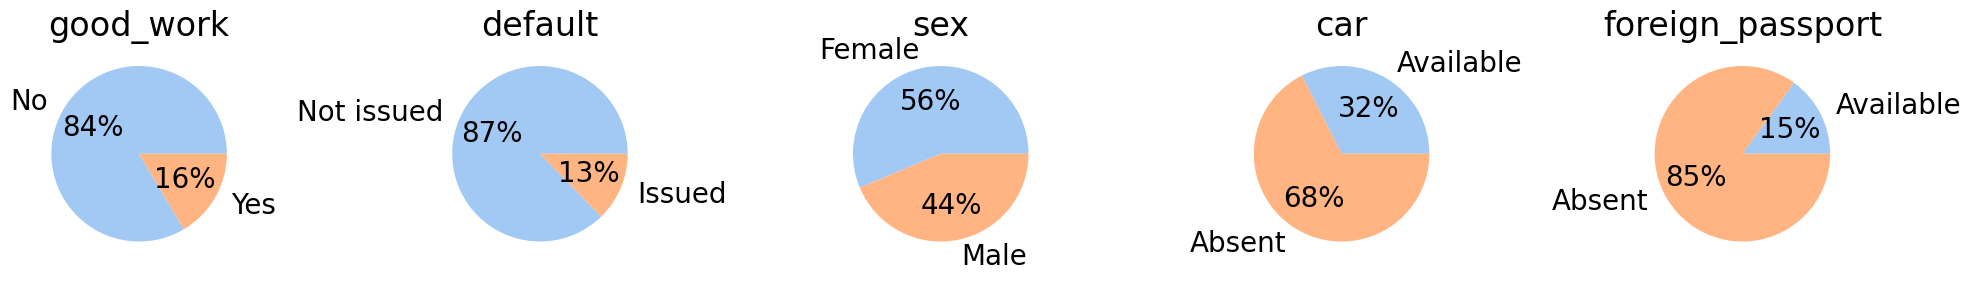

In [17]:
fig, ax = plt.subplots(1, 5, figsize=(20, 7))

good_work(ax[0])
default(ax[1])
sex(ax[2])
car(ax[3])
foreign_password(ax[4])
fig.tight_layout(pad=1.0)
plt.savefig("charts_1.png", dpi=500)

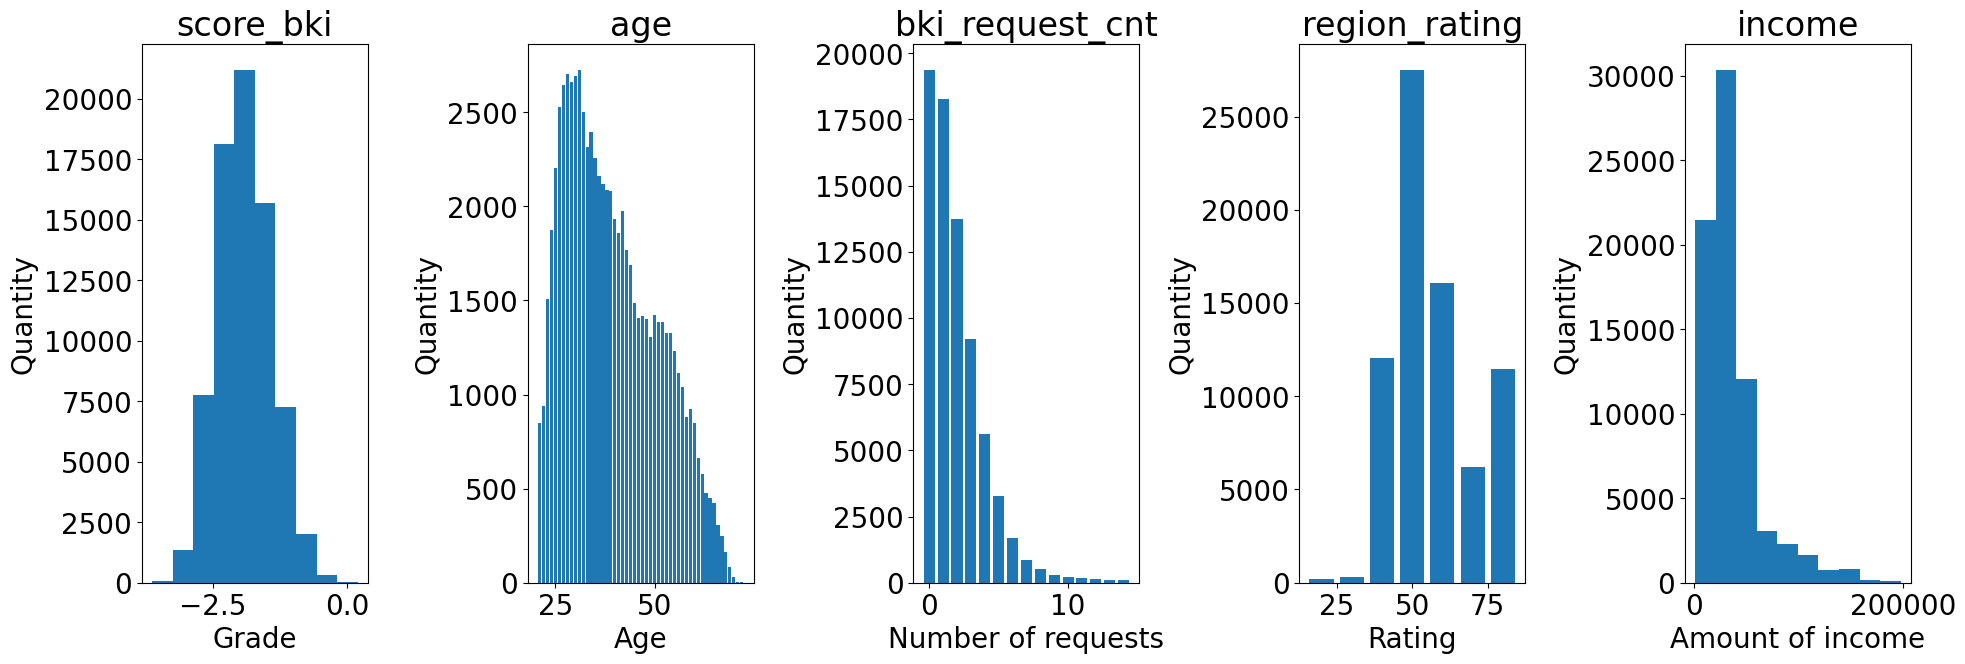

In [18]:
fig, ax = plt.subplots(1, 5, figsize=(20, 7))

score_bki(ax[0])
age(ax[1])
bki_request_cnt(ax[2])
region_rating(ax[3])
income(ax[4])
fig.tight_layout(pad=1.0)
plt.savefig("charts_2.png", dpi=500)